In [16]:
import sbmlcore, pandas, numpy, pytest
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. Easy case: PncA (3pl1)

One chain, no offsets, small structure

In [8]:
a = {'segid': ['A', 'A', 'A', 'A'], 'mutation': ['M1D','R2K', 'A3V', 'A3F']}
df = pandas.DataFrame.from_dict(a)
df

,segid,mutation
0,A,M1D
1,A,R2K
2,A,A3V
3,A,A3F


### Feature: amino acid volume change

In [9]:
a = sbmlcore.AminoAcidVolumeChange()
df = a.add_feature(df)
df

,segid,mutation,d_volume
0,A,M1D,-51.8
1,A,R2K,-4.8
2,A,A3V,51.4
3,A,A3F,101.3


### Features: hydropathy scale changes

In [10]:
b = sbmlcore.AminoAcidHydropathyChangeKyteDoolittle()
df = b.add_feature(df)
b = sbmlcore.AminoAcidHydropathyChangeWimleyWhite()
df = b.add_feature(df)
df

,segid,mutation,d_volume,d_hydropathy_KD,d_hydropathy_WW
0,A,M1D,-51.8,-5.4,2.85
1,A,R2K,-4.8,0.6,0.81
2,A,A3V,51.4,2.4,-0.86
3,A,A3F,101.3,1.0,-0.91


### Features: STRIDE (secondary structure, phi, psi, SASA)

In [11]:
s = sbmlcore.Stride('tests/3pl1.pdb', offsets ={'A':0})
df = s.add_feature(df, feature_name='all')
df

,segid,mutation,d_volume,d_hydropathy_KD,d_hydropathy_WW,secondary_structure,secondary_structure_long,phi,psi,residue_sasa,B,C,E,G,H,T
0,A,A3V,51.4,2.4,-0.86,E,Strand,-126.53,153.85,0.0,0,0,1,0,0,0
1,A,A3F,101.3,1.0,-0.91,E,Strand,-126.53,153.85,0.0,0,0,1,0,0,0
2,A,M1D,-51.8,-5.4,2.85,C,Coil,0.00,-35.20,86.2,0,1,0,0,0,0
3,A,R2K,-4.8,0.6,0.81,E,Strand,-117.94,133.99,54.7,0,0,1,0,0,0


### Feature: effect on protein stability as estimated by DeepDDG

In [12]:
a = sbmlcore.DeepDDG('tests/3pl1.ddg', offsets = {'A': 0})
df = a.add_feature(df)
df

,segid,mutation,d_volume,d_hydropathy_KD,d_hydropathy_WW,secondary_structure,secondary_structure_long,phi,psi,residue_sasa,B,C,E,G,H,T,deep_ddG
0,A,A3V,51.4,2.4,-0.86,E,Strand,-126.53,153.85,0.0,0,0,1,0,0,0,-1.446
1,A,A3F,101.3,1.0,-0.91,E,Strand,-126.53,153.85,0.0,0,0,1,0,0,0,-1.220
2,A,M1D,-51.8,-5.4,2.85,C,Coil,0.00,-35.20,86.2,0,1,0,0,0,0,-0.903
3,A,R2K,-4.8,0.6,0.81,E,Strand,-117.94,133.99,54.7,0,0,1,0,0,0,-1.012


<AxesSubplot:>

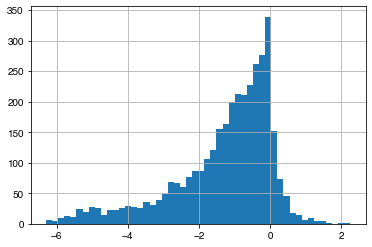

In [7]:
a.results.deep_ddG.hist(bins=50)

### Feature: Surface Accessible Solvant Area (via FreeSASA)

In [13]:
a = sbmlcore.FreeSASA('tests/3pl1.pdb')
a.add_feature(df)
df

,segid,mutation,d_volume,d_hydropathy_KD,d_hydropathy_WW,secondary_structure,secondary_structure_long,phi,psi,residue_sasa,...,E,G,H,T,deep_ddG,resid,resname_1,chain_offsets,resname_3,pdb_resid
id,,,,,,,,,,,,,,,,,,,,,
A3,A,A3V,51.4,2.4,-0.86,E,Strand,-126.53,153.85,0.0,...,1,0,0,0,-1.446,3,A,0,ALA,3
A3,A,A3F,101.3,1.0,-0.91,E,Strand,-126.53,153.85,0.0,...,1,0,0,0,-1.220,3,A,0,ALA,3
A1,A,M1D,-51.8,-5.4,2.85,C,Coil,0.00,-35.20,86.2,...,0,0,0,0,-0.903,1,M,0,MET,1
A2,A,R2K,-4.8,0.6,0.81,E,Strand,-117.94,133.99,54.7,...,1,0,0,0,-1.012,2,R,0,ARG,2


### Feature: distances (via MDAnalysis)

In [14]:
a = sbmlcore.StructuralDistances('tests/3pl1.pdb', distance_selection="resname FE2", distance_name='dist_FE')

In [15]:
df = a.add_feature(df)
df

,segid,mutation,d_volume,d_hydropathy_KD,d_hydropathy_WW,secondary_structure,secondary_structure_long,phi,psi,residue_sasa,B,C,E,G,H,T,deep_ddG,dist_FE
0,A,M1D,-51.8,-5.4,2.85,C,Coil,0.00,-35.20,86.2,0,1,0,0,0,0,-0.903,29.948318
1,A,R2K,-4.8,0.6,0.81,E,Strand,-117.94,133.99,54.7,0,0,1,0,0,0,-1.012,27.459823
2,A,A3V,51.4,2.4,-0.86,E,Strand,-126.53,153.85,0.0,0,0,1,0,0,0,-1.446,24.149025
3,A,A3F,101.3,1.0,-0.91,E,Strand,-126.53,153.85,0.0,0,0,1,0,0,0,-1.220,24.149025


In [52]:
a = sbmlcore.TrajectoryDistances('tests/rpob-5uh6-3-warm.gro.gz', ['tests/rpob-5uh6-3-md-1-50ns-dt10ns-nojump.xtc'], 'resname RFP', 'dRIF')

[70.63777634 71.33223904 74.58824203 ... 48.9140271  48.59965847
 46.0846648 ]


In [ ]:
a

In [39]:
p = numpy.array([[1,2,3]])
q = numpy.array([[4,5,6]])

z = numpy.concatenate([p,q])


In [47]:
for i in range(z.shape[1]):
    print(i, z[:,i])

0 [1 4]
1 [2 5]
2 [3 6]


In [44]:
z[:,2]

array([3, 6])

In [51]:
numpy.percentile(z, 10, axis=0)

array([1.3, 2.3, 3.3])

## 2. Hard case: RNA polymerase (5uh6)

Multiple chains, some require offsets, large protein, not all resolved in PDB

In [12]:
a = {'segid': ['A', 'A', 'B', 'B', 'C', 'C', 'C', 'D', 'D', 'E', 'F', 'F'], 'mutation': ['I3F','Q5T', 'S10Q', 'S4V', 'S450L', 'H445D', 'I491F', 'I491V', 'G594E', 'A101E', 'E245D', 'A3W']}
df2 = pandas.DataFrame.from_dict(a)
df2

,segid,mutation
0,A,I3F
1,A,Q5T
2,B,S10Q
3,B,S4V
4,C,S450L
5,C,H445D
6,C,I491F
7,D,I491V
8,D,G594E
9,E,A101E


### Feature: amino acid volume change

In [13]:
a = sbmlcore.AminoAcidVolumeChange()
df2 = a.add_feature(df2)
df2

,segid,mutation,d_volume
0,E,A101E,49.8
1,F,A3W,139.2
2,F,E245D,-27.3
3,D,G594E,78.3
4,C,H445D,-42.1
5,A,I3F,23.2
6,C,I491F,23.2
7,D,I491V,-26.7
8,A,Q5T,-27.7
9,C,S450L,77.7


### Features: hydropathy scale changes

In [14]:
b = sbmlcore.AminoAcidHydropathyChangeKyteDoolittle()
df2 = b.add_feature(df2)
b = sbmlcore.AminoAcidHydropathyChangeWimleyWhite()
df2 = b.add_feature(df2)
df2

,segid,mutation,d_volume,d_hydropathy_KD,d_hydropathy_WW
0,E,A101E,49.8,-5.3,1.28
1,F,A3W,139.2,-2.7,-0.57
2,F,E245D,-27.3,0.0,0.80
3,D,G594E,78.3,-3.1,0.47
4,C,H445D,-42.1,-0.3,1.04
5,A,I3F,23.2,-1.7,0.23
6,C,I491F,23.2,-1.7,0.23
7,D,I491V,-26.7,-0.3,0.28
8,A,Q5T,-27.7,2.8,-0.08
9,C,S450L,77.7,4.6,-1.02


### Features: STRIDE (secondary structure, phi, psi, SASA)

Note chain C (rpoB) requires an offset.

In [15]:
s = sbmlcore.Stride('tests/5uh6-protein-chains.pdb' , offsets = {'A': 0, 'B': 0, 'C':-6, 'D':0, 'E':0, 'F':0})
df2 = s.add_feature(df2, feature_name='all')
df2

,segid,mutation,d_volume,d_hydropathy_KD,d_hydropathy_WW,secondary_structure,secondary_structure_long,phi,psi,residue_sasa,B,C,E,G,H,T
0,E,A101E,49.8,-5.3,1.28,H,AlphaHelix,-89.66,4.29,43.2,0.0,0.0,0.0,0.0,1.0,0.0
1,F,A3W,139.2,-2.7,-0.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,F,E245D,-27.3,0.0,0.80,H,AlphaHelix,-62.01,-38.95,94.0,0.0,0.0,0.0,0.0,1.0,0.0
3,D,G594E,78.3,-3.1,0.47,T,Turn,-90.49,19.79,69.9,0.0,0.0,0.0,0.0,0.0,1.0
4,C,H445D,-42.1,-0.3,1.04,H,AlphaHelix,-66.73,-38.07,6.6,0.0,0.0,0.0,0.0,1.0,0.0
5,A,I3F,23.2,-1.7,0.23,C,Coil,0.00,58.91,41.3,0.0,1.0,0.0,0.0,0.0,0.0
6,C,I491F,23.2,-1.7,0.23,E,Strand,-132.44,124.09,20.6,0.0,0.0,1.0,0.0,0.0,0.0
7,D,I491V,-26.7,-0.3,0.28,H,AlphaHelix,-81.97,9.07,4.5,0.0,0.0,0.0,0.0,1.0,0.0
8,A,Q5T,-27.7,2.8,-0.08,C,Coil,-129.03,120.75,121.1,0.0,1.0,0.0,0.0,0.0,0.0
9,C,S450L,77.7,4.6,-1.02,E,Strand,-111.35,148.81,7.4,0.0,0.0,1.0,0.0,0.0,0.0


In [16]:
a = sbmlcore.DeepDDG('tests/5uh6-protein-chains.ddg' , offsets = {'A': 0, 'B': 0, 'C':-6, 'D':0, 'E':0, 'F':0})
df2 = a.add_feature(df2)
df2

,segid,mutation,d_volume,d_hydropathy_KD,d_hydropathy_WW,secondary_structure,secondary_structure_long,phi,psi,residue_sasa,B,C,E,G,H,T,deep_ddG
0,E,A101E,49.8,-5.3,1.28,H,AlphaHelix,-89.66,4.29,43.2,0.0,0.0,0.0,0.0,1.0,0.0,0.089
1,F,A3W,139.2,-2.7,-0.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,F,E245D,-27.3,0.0,0.80,H,AlphaHelix,-62.01,-38.95,94.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.429
3,D,G594E,78.3,-3.1,0.47,T,Turn,-90.49,19.79,69.9,0.0,0.0,0.0,0.0,0.0,1.0,-0.117
4,C,H445D,-42.1,-0.3,1.04,H,AlphaHelix,-66.73,-38.07,6.6,0.0,0.0,0.0,0.0,1.0,0.0,-2.352
5,A,I3F,23.2,-1.7,0.23,C,Coil,0.00,58.91,41.3,0.0,1.0,0.0,0.0,0.0,0.0,-0.426
6,C,I491F,23.2,-1.7,0.23,E,Strand,-132.44,124.09,20.6,0.0,0.0,1.0,0.0,0.0,0.0,-1.740
7,D,I491V,-26.7,-0.3,0.28,H,AlphaHelix,-81.97,9.07,4.5,0.0,0.0,0.0,0.0,1.0,0.0,-1.141
8,A,Q5T,-27.7,2.8,-0.08,C,Coil,-129.03,120.75,121.1,0.0,1.0,0.0,0.0,0.0,0.0,-0.246
9,C,S450L,77.7,4.6,-1.02,E,Strand,-111.35,148.81,7.4,0.0,0.0,1.0,0.0,0.0,0.0,-0.962


<AxesSubplot:>

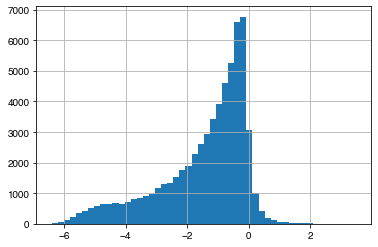

In [13]:
a.results.deep_ddG.hist(bins=50)